# Correlação e Gráfico de Dispersão

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
nome_arq = 'correl_ex1.xls'

In [10]:
df = pd.read_excel(nome_arq)
df.head(3)

,Semana,Nº de comerciais,Volume de vendas (100 reais)
0,1,2,50
1,2,5,57
2,3,1,41


In [55]:
df.shape

(10, 3)

In [54]:
df_quant = df.iloc[:,0:3]
df_quant.columns

Index(['Semana', 'nr_comerciais', 'vendas'], dtype='object')

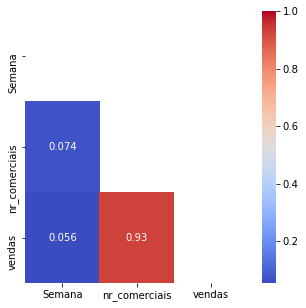

In [56]:
fig, ax = plt.subplots(figsize=(5, 5)) 
mask = np.zeros_like(df_quant.corr().abs())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df_quant.corr().abs(), mask= mask, ax= ax, cmap='coolwarm', annot= True)

In [59]:
correlacao = df_quant.corr().abs()
correlacao.where(np.triu(np.ones(correlacao.shape), k=1).astype(np.bool))

,Semana,nr_comerciais,vendas
Semana,NaN,0.073855,0.055532
nr_comerciais,NaN,NaN,0.930491
vendas,NaN,NaN,NaN


In [18]:
xrot = 'nr_comerciais'
xcol = 1
yrot = 'vendas'
ycol = 2
titulo = 'Comerciais x Vendas'

In [19]:
df.rename(columns= {df.columns[xcol]: xrot,
                   df.columns[ycol]: yrot}, inplace=True)
df.columns

Index(['Semana', 'nr_comerciais', 'vendas'], dtype='object')

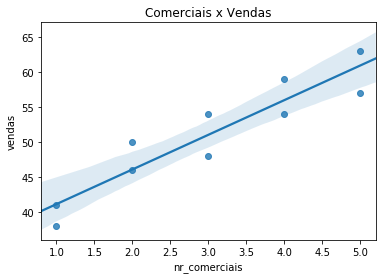

In [20]:
sns.regplot(x= xrot, y= yrot, data=df)
#sns.despine()   # remove the top and right spines from plot
plt.title(titulo)
plt.xlabel(xrot)
plt.ylabel(yrot)
#plt.savefig(nomefig)
plt.show()